## Linear Regression 

Linear Regression is a model fitting algorithm that finds the relationship of two variables. Regression is based on a predictive dependent variable that is on the based of the independent variable. This is supervised learning where we train our model based on data that is given previoulsy to the model. The model produced is an output of a model that best relates to an area between the independent and dependent variables. In addition to the model, it creates an margin of error for our data that will be use to produce a model with correct predictions


#### Data Set


Below, we look at a dataset of Housing data that consists of four variables.


The data contains the following columns:

* SQFT: The square feet total of the house
* Bdrms: The total amount of bedrooms in the house for sale
* Age: The age of the house that is listed here
* Price: The price of the house 


For this project for linear regression, we will be looking at the relationship between the Square feet and the Price of the house. This data together should be able to show a linear relationship that we are able to use to make a model off of. 

##### Below we start our project with imports of the housing dataset
___

In [116]:
using Plots
using Random
using CSV

data = CSV.read("housing-data.csv")
dataTuple = [x for x in zip(data.sqft, data.price)];

___
The following code produces a plot of the selected data that listed above. 
___

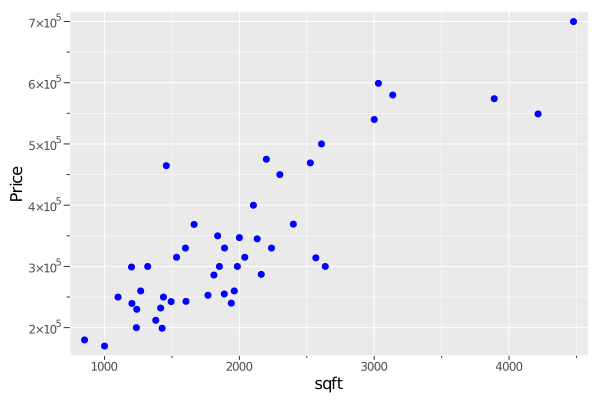

In [117]:
theme(:ggplot2)
scatter(dataTuple,
        xaxis = "sqft",
        yaxis = "Price",
        color = "blue",
        label = false)

___
Looking at our data, we can see a linear relationship between the the two variables here that we are working with. 

For linear regression model, we will use a training and testing set split of our data to test how much our model can correctly predict the other data in our model before we apply it to newer data given to the model. 

We will randomly subset a half our data to be train and test, while we will split our train data into both x and y training sets
___

In [142]:
#set a random subset of data into train and test
train_data = randsubseq(dataTuple, .5)
test_data = [x for x in dataTuple if x ∉ train_data]
train_x = [train_data[i][1] for i = 1:length(train_data)]
train_y = [train_data[i][2] for i = 1:length(train_data)];

___
For linear regression, we want a line that best approximates this point. As a result, we want to approximatly  solve a system of equation between all the points.

In this case, we would want something like this. 
<center> y<sup>1</sup> $\approx$ w<sub>1</sub>* x<sup>1</sup> + w<sub>2</sub><\center>
<center> y<sup>2</sup> $\approx$ w<sub>1</sub>* x<sup>2</sup> + w<sub>2</sub><\center>
    <center> $\vdots$ <\center>
<center> y<sup>n</sup> $\approx$ w<sub>1</sub>* x<sup>n</sup> + w<sub>2</sub><\center>
    
In this case, since we do have many points, we will use the last equation as n, to show the rest of the data.
    
In a matrix representation, we have it look like this.

$$
\left(\begin{array}{cc} 
X_1 & 1\\
X_2 & 1\\
X_3 & 1\\
X_4 & 1\\
\vdots & \vdots\\
X_n & 1_n\\
\end{array}\right)
\left(\begin{array}{cc} 
w_1 \\ 
w_2 \\
\end{array}\right)
=
\left(\begin{array}{cc} 
y_1\\
y_2\\
y_3\\
y_4\\
\vdots\\
y_n\\
\end{array}\right)
$$ 

<center> Simple Terms:                    $x * w = y$ <\center>
    
Since we can only approximate the equation, we have use $ \hat w  $ and solve for this variable in our equation. We will use pseudoinverse.
    

<center> $x * \hat w = y$ <\center>
<center> $(x^t * x) * \hat w = x^t* y               $<\center>

What we have here is $(x^t * x)$  is an identity matrix and $x^t = (a^t * a)$ <sup>-1 </sup> $ *  a^t$
    
As a result we have:
<center> $\hat w = (a^t * a)$ <sup>-1 </sup>  $ *   a^t * y$ <\center>
    
<center> $\hat w = \left(\begin{array}{cc} 
w_1 \\ 
w_2 \\
\end{array}\right) $
<\center>

$w_1$ is the slope in the linear equation and
$w_2$ is the bias for the linear equation

___

In [119]:
#first make matrix X

X = ones(length(train_data), 2)
X[:,1] = train_x;

#next solve for ŵ: 
ŵ = (X'X)\(X'*train_y);

# Ax = B, then x = A/B solves the system



___
In the linear line we have 4 parts to it.


* Y: Dependent Variable 
* $b$: Slope 
* X: Independent Variable
* $a$: Intercept

> $y = b* X + a $ 

For our model we will use $\hat w$ for our values

* Y: Dependent Variable 
* $w_1$: Slope - Weights
* X: Independent Variable
* $w_2$: Bias - Weights

> $y = w_1 * X + w_2 $ 

___

In [120]:
#define the regession line, i.e., the prediction function
prediction(x) = ŵ[1] *x + ŵ[2]

prediction (generic function with 1 method)

Below, we place the prediction line on to our train data and also our test data to see the predicted regression values

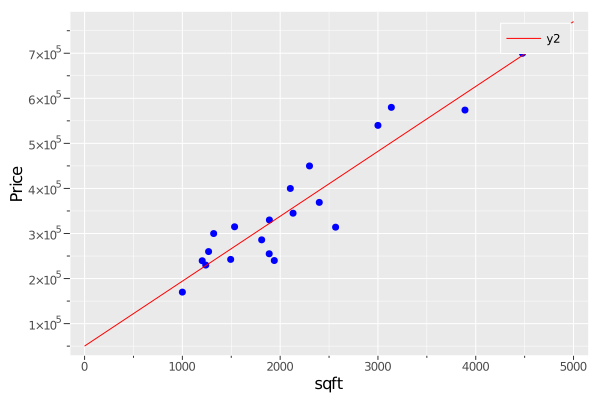

In [140]:
scatter(train_data,
        xaxis = "sqft",
        yaxis = "Price",
        color = "blue",
        label = false)
plot!([(x , prediction(x)) for x = 0:5000], color = "red")

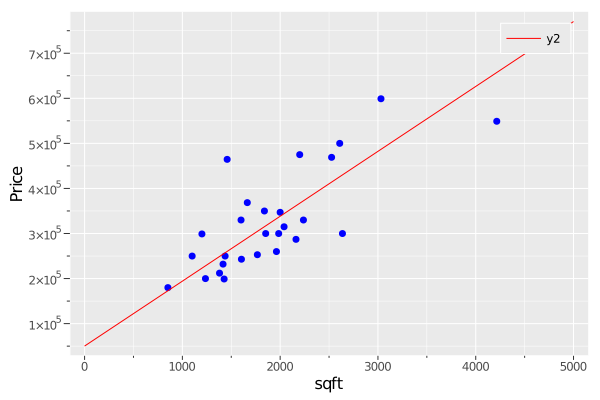

In [141]:
scatter(test_data,
        xaxis = "sqft",
        yaxis = "Price",
        color = "blue",
        label = false)
plot!([(x , prediction(x)) for x = 0:5000], color = "red")

In both our models or datasets, the line is well represented of our data regression line. But, some parts of the data maybe underrepsented in this model. We want to find the maximum error produced by our model, where we can create a boundary for the values that can be produced 
___

In [123]:
#get the errors in the line
error_array = [abs(prediction(x[1]) - x[2]) for x in train_data];

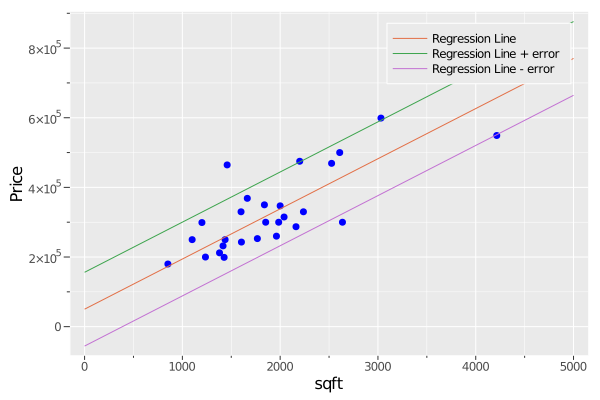

In [135]:
scatter(test_data,
        xaxis = "sqft",
        yaxis = "Price",
        color = "blue",
        label = false)
plot!([(x , prediction(x)) for x = 0:5000],
        label = "Regression Line")
plot!([(x , prediction(x) + maximum(error_array)) for x = 0:5000],
        label = "Regression Line + error")
plot!([(x , prediction(x) - maximum(error_array)) for x = 0:5000],
        label = "Regression Line - error")


In [129]:
prediction_interval(x) = (prediction(x)- maximum(error_array), prediction(x)+ maximum(error_array))

prediction_interval (generic function with 1 method)

In [127]:
prediction_interval(2100)

(246737.85079446185, 458572.1464695007)